## Load and prepare the data
Start by loading the dataset and shaping it so that it's suitable for use in machine learning. This dataset is a subset of a much larger dataset. The data requires an amount of prep work before it's of any use at all. We here use a url link to load the data. If you cannot load the data via URL link, please download the data from GitHub and upload the data to colab manually.

In [2]:
import xgboost as xgb

In [3]:
import pandas as pd

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url)

# df = pd.read_csv('Exercise2BusData.csv')
df.head(10)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:03,10033,41355,1,-23,0,39,-4,28.641509
1,01/05/2022 07:21,10033,41356,1,168,0,39,181,27.880597
2,01/05/2022 07:37,10033,44400,1,231,0,39,244,27.852941
3,01/05/2022 07:50,10033,44399,1,150,17,39,143,27.826087
4,01/05/2022 19:29,10033,44060,1,965,35,51,947,42.029412
5,01/05/2022 19:58,10033,41351,1,33,19,46,30,38.970588
6,01/05/2022 20:14,10033,44399,1,75,26,46,63,38.840580
7,01/05/2022 20:28,10033,41356,1,58,15,46,52,34.059701
8,01/05/2022 20:57,10033,44060,1,904,35,46,888,34.102941
9,01/05/2022 21:00,10033,41357,1,141,12,46,140,34.000000


For simplicity, we only use 1000 records here. If your computer cannot run this tutorial in a short time, please set a smaller number in the following code. For example, 800.

In [4]:
df = df.iloc[:1000]
#df

Remove columns that are no longer needed.

In [5]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

Draw a histogram by using seaborn to show the distribution of arrival delay.

<Axes: xlabel='Arrival_delay', ylabel='Count'>

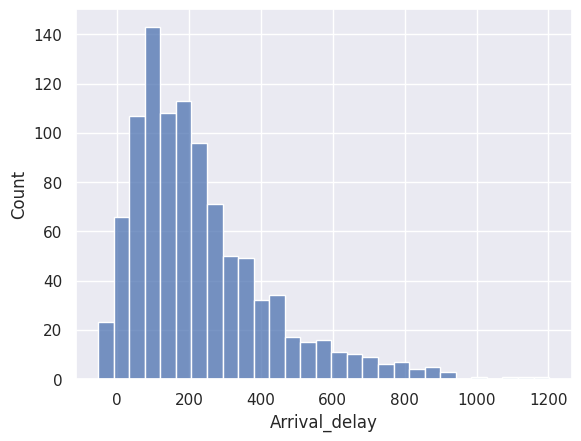

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.histplot(x=df['Arrival_delay'])

Find out how much influence input variables such as "Upstream_stop_delay" and "Dwell_time" have on the values in the "Arrival_delay" column.

In [7]:
corr_matrix = df.corr()
corr_matrix['Arrival_delay'].sort_values(ascending=False)

,Arrival_delay
Arrival_delay,1.000000
Upstream_stop_delay,0.994148
Dwell_time,0.218683
Recurrent_delay,0.185648
Scheduled_travel_time,0.111417


Feature engineering visually explore and understand the relationships between different features (variables) in a dataset. Seaborn pair plots help identify patterns, correlations, and potential outliers, aiding in the selection and transformation of features to improve model performance. It is a crucial step in data preprocessing to enhance the accuracy and effectiveness of machine learning models.​

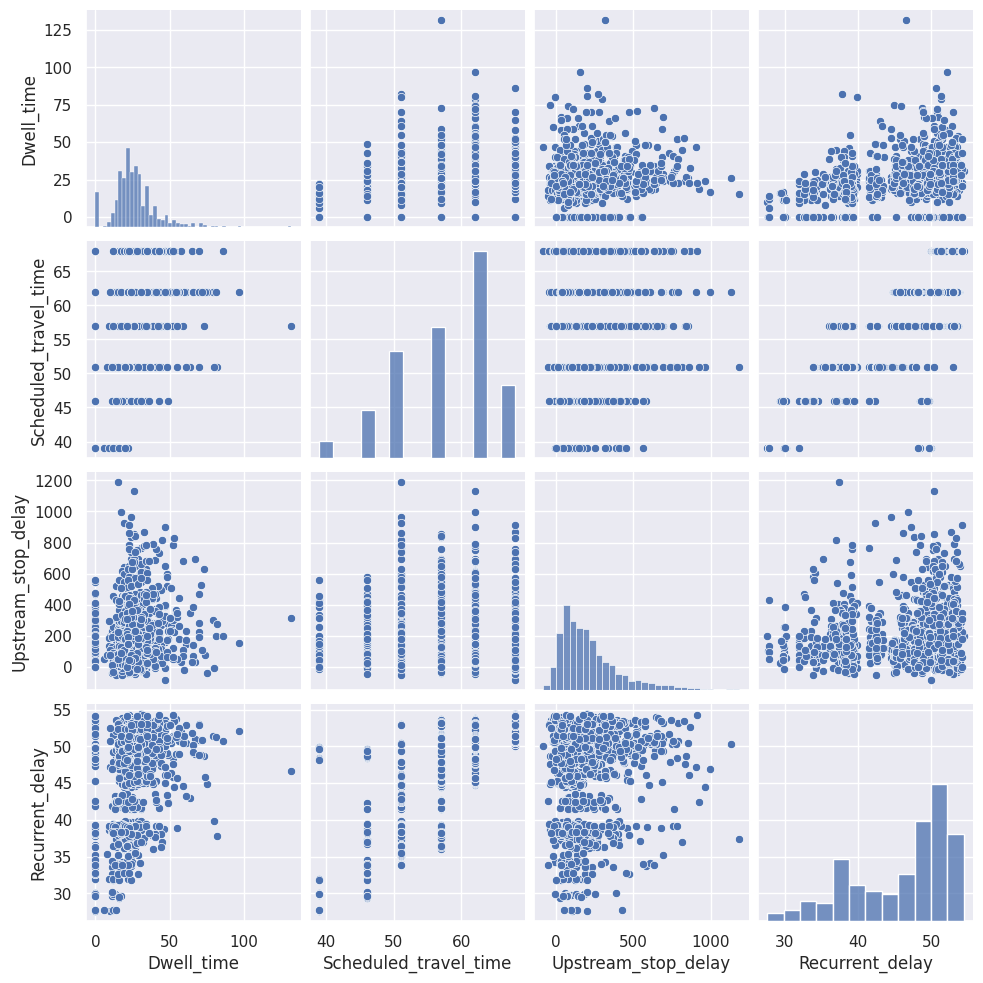

In [8]:
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

sns.pairplot(x)

## Train / Test Split

Before modeling we need to split our data into a training and test set. The training set is used to train the model and the test set to evaluate its performance.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

,Arrival_delay
1779,80
1287,655
1166,190
1961,308
1494,471
...,...
1107,198
1271,125
1861,152
1436,385


Normalization

In [23]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# y_train_scaled = scaler.transform(y_train)
# y_test_scaled = scaler.transform(y_test)

Transform the datasets into XGboost format

In [17]:
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

Parameter setting

In [25]:
# param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
# param['nthread'] = 4
# param['eval_metric'] = 'logloss'

# num_round = 10  # 迭代次数

param_grid = {
    'n_estimators': [50,100,200],       # number of tree
    'max_depth': [3,5,7,10],         # max depth
    'learning_rate': [0.01,0.05,0.1,0.2],  # learning rate
    'subsample': [0.8,1.0],          # proportion of subsample
}


Train Model

In [26]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# evallist = [(dtest, 'eval'), (dtrain, 'train')]
# bst = xgb.train(param, dtrain, num_round, evals=evallist, early_stopping_rounds=10)

# 定义参数网格

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5, verbose=2, scoring='neg_mean_squared_error')


grid_search.fit(X_train_scaled, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Negative MSE:", best_score)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END

Train a XGBoost Model with optimal parameters

In [27]:
best_xgb = XGBRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
)
best_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Make predictions

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


y_pred = best_xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 12.758914525583386
Mean Squared Error: 359.2378195498867
R-squared: 0.9904035591837367


Actual vs Prediction

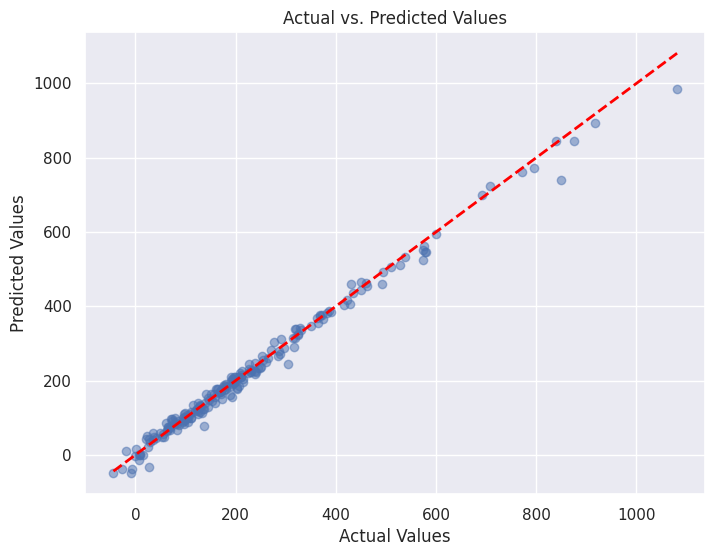

In [31]:
# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()